In [1]:
from sympy import symbols, init_printing
init_printing()
from celmech.hamiltonian import HamiltonianPoincare
from celmech.transformations import poincare_vars_from_sim

In [2]:
import rebound
import numpy as np

def make_sim(j, k):
    mass = 1.e-5
    e0 = 0.01 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, pomega = np.pi, P=1.)
    sim.add(m=4*mass, e=1.e-5, P=j/float(j-k))
    sim.add(m=mass, e=e0, P=5.)
    sim.move_to_com()
    return sim

j=5
k=1
sim = make_sim(j,k)

In [3]:
Hsim = HamiltonianPoincare()
Hsim.initialize_from_sim(sim)

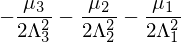

In [4]:
Hsim.H

In [5]:
Hsim.add_all_resonance_subterms(1,2,j,k)

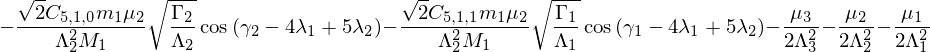

In [6]:
Hsim.H

In [7]:
Norbits = 300
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

Nsol = np.zeros((4*(sim.N-1), Nout))
symsol = np.zeros((4*(sim.N-1), Nout))
for i, time in enumerate(times):
    sim.integrate(time)
    Hsim.integrate(time)
    Nsol[:,i] = poincare_vars_from_sim(sim)
    symsol[:,i] = list(Hsim.integrator.y)

In [8]:
Hsim.integrator.y[::4]
np.mod(Hsim.integrator.y[1::4],2*np.pi)
np.mod(Hsim.integrator.y[2::4],2*np.pi)

array([  1.09226626e-08,   1.62304799e-09,   5.37220904e-09])

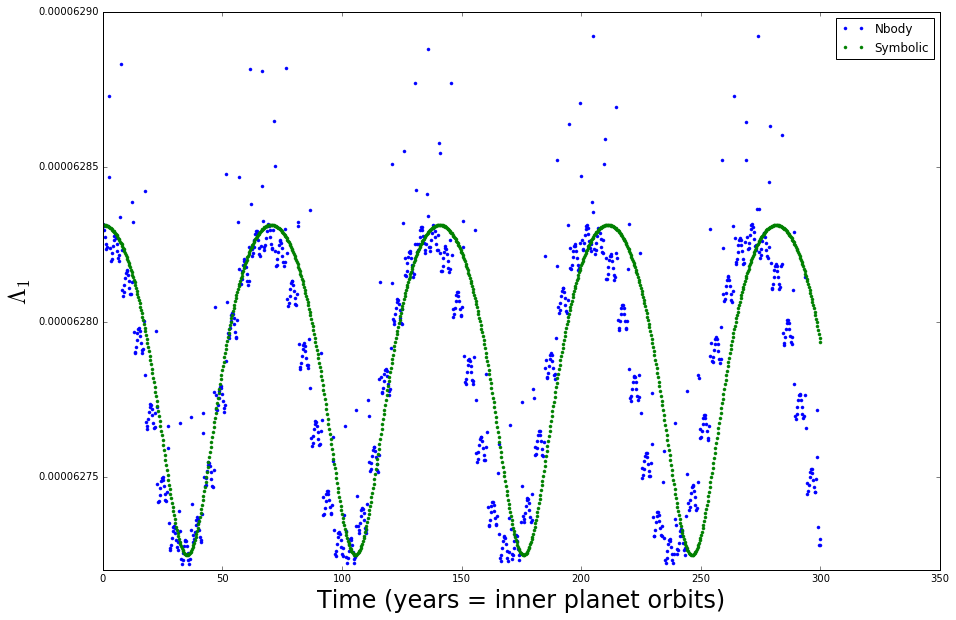

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, Nsol[0,:], '.', label='Nbody')
ax.plot(times, symsol[0,:], '.', label='Symbolic')

ax.legend()

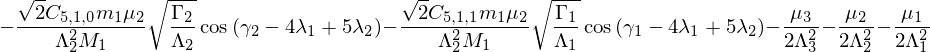

In [10]:
Hsim.H

In [11]:
from celmech import transformations

In [12]:
%run -i celmech/transformations
sim = make_sim(j,k)
pvars=np.array(transformations.poincare_vars_from_sim(sim))
n1,n2=sim.particles[1].n,sim.particles[2].n
m1,m2=sim.particles[1].m,sim.particles[2].m
Mstar=sim.particles[0].m
G=sim.G
poincare_vars_to_andoyer_vars(pvars[:8],G,Mstar,m1,m2,n1,n2,10,2,actionScale=pvars[0]/2)

In [22]:
Hsim = HamiltonianPoincare()
Hsim.initialize_from_sim(sim)
print Hsim.Nlambda
print Hsim.Ngamma
print Hsim.NLambda
print np.sqrt(2*Hsim.NGamma / Hsim.NLambda)

[ 3.14159265  6.28318125  0.        ]
[ 3.14159265  0.          0.        ]
[  6.28312574e-05   2.70731149e-04   1.07441822e-04]
[  1.00001557e-02   9.99999932e-06   1.00001098e-02]


In [24]:
[p.e for p in sim.particles[1:]]

In [26]:
Hsim.m